In [27]:
import numpy as np
import matplotlib.pyplot as plt

### Chapter 2 - Part 1 - Problem 1

To simulate from the hierarchical Bayesian model:

1. Draw `p` from a **Uniform(0.4, 0.8)** distribution.
2. Given each `p[i]`, sample `n[i]` from a **Geometric(p[i]/2)** distribution.
   - Remember: in NumPy, `np.random.geometric(p)` gives the number of trials until the first success (starting from 1).
3. Given each pair `(p[i], n[i])`, sample `X[i]` from a **Binomial(n[i] + 1, p[i])** distribution.
4. Repeat steps 1–3 **1000 times**.
5. Optionally, visualize `X` (e.g., with a histogram) to inspect the distribution.


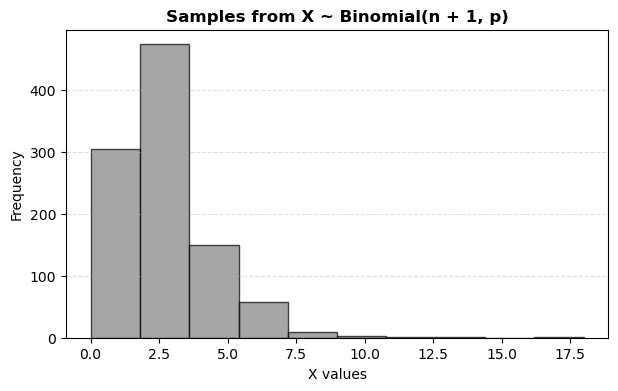

In [28]:
N = 1000
p = np.random.uniform(0.4, 0.8, N)
n = np.random.geometric(p / 2)
X = np.array([np.random.binomial(n[i] + 1, p[i]) for i in range(N)])

# Step 5: visualize results
plt.figure(figsize=(7,4))
plt.hist(X, color='grey', edgecolor='black', alpha=0.7)
plt.title("Samples from X ~ Binomial(n + 1, p)", fontsize=12, weight='bold')
plt.xlabel("X values")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### Chapter 2 - Part 2 - Problem 2

To generate samples from a **mixture of two exponential distributions** using a *uniform selector*:

1. Define the two component distributions:
   - Distribution 1: Exponential with rate parameter $\lambda_1 = 1$
   - Distribution 2: Exponential with rate parameter $\lambda_2 = \frac{1}{10}$
2. The mixture weights are:
   - $\omega_1 = 0.3$ → probability of sampling from Distribution 1  
   - $\omega_2 = 0.7$ → probability of sampling from Distribution 2
3. Generate a random number $U_i \sim \text{Uniform}(0, 1)$ for each sample.
   - If $U_i < \omega_1$, sample from **Distribution 1**
   - Otherwise, sample from **Distribution 2**
4. Repeat this process for all 1000 samples to form the final mixture sample $X$.

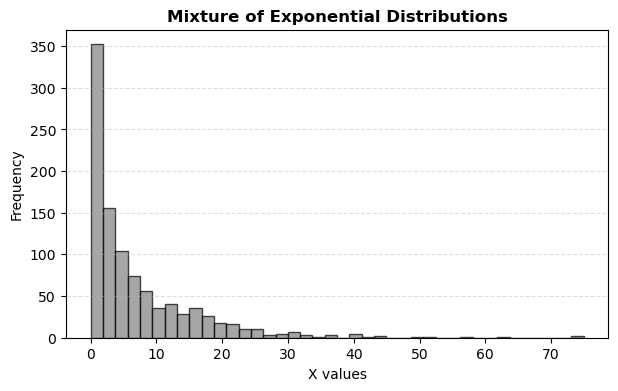

In [29]:
# parameters
n = 1000
lambda1 = 1
lambda2 = 1/10
w1 = 0.3
w2 = 0.7

# initialize
X = np.zeros(n)
U = np.random.uniform(0, 1, n)

# generate mixture samples
for i in range(n):
    if U[i] < w1:
        X[i] = np.random.exponential(scale=1/lambda1)   # component 1
    else:
        X[i] = np.random.exponential(scale=1/lambda2)   # component 2

plt.figure(figsize=(7,4))
plt.hist(X, bins=40, color='grey', edgecolor='black', alpha=0.7)
plt.title("Mixture of Exponential Distributions", fontsize=12, weight='bold')
plt.xlabel("X values")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.show()

### Chapter 2 - Part 2 - Problem 1

To simulate the next state in a Markov Chain using a uniform random variable:

1. Suppose the current state is $i$, with transition probabilities 
   $$
   P(i \to 1) = p_1, \quad P(i \to 2) = p_2, \quad \dots, \quad P(i \to m) = p_m,
   $$
   where $\sum_{j=1}^m p_j = 1$.

2. Generate $U \sim \text{Uniform}(0,1)$.

3. Construct the cumulative probabilities:
   $$
   \text{cum\_probs} = \big(p_1, \; p_1 + p_2, \; \dots, \; p_1 + p_2 + \cdots + p_m \big).
   $$

4. Determine the next state by checking which interval $U$ falls into:
   - If $0 \leq U < p_1$, choose state 1.  
   - If $p_1 \leq U < p_1 + p_2$, choose state 2.  
   - Continue similarly until all states are covered.

This works because the transition probabilities partition the unit interval $[0,1]$ into disjoint segments, and $U$ selects one segment according to the correct probabilities.


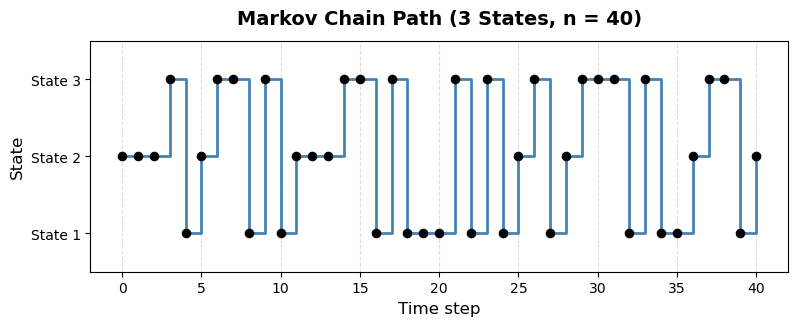

In [30]:
n = 40
P = np.array([[0.2, 0.5, 0.3], 
              [0.1, 0.3, 0.6],
              [0.5, 0.1, 0.4]])
X = np.zeros(n+1, dtype=int)
U = np.random.rand()
X[0] = 2 #start at state 2

for i in range(n):
    u = np.random.uniform(0, 1)   # uniform random number
    p1, p2, p3 = P[X[i]-1]        # transition probabilities

    if u < p1:
        X[i+1] = 1
    elif u < p1 + p2:
        X[i+1] = 2
    else:
        X[i+1] = 3

# plot
plt.figure(figsize=(9, 3))
plt.step(range(n+1), X, where='post', color='steelblue', lw=2)
plt.scatter(range(n+1), X, color='black', s=35, zorder=3)
plt.title("Markov Chain Path (3 States, n = 40)", fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("State", fontsize=12)
plt.yticks([1, 2, 3], ["State 1", "State 2", "State 3"])
plt.xticks(np.arange(0, n+1, 5))
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.ylim(0.5, 3.5)
plt.show()

### Chapter 2 - Part 3 - Problem 1

We generate a Markov chain path of length $40$ using the Gaussian transition density (Algorithm 1)

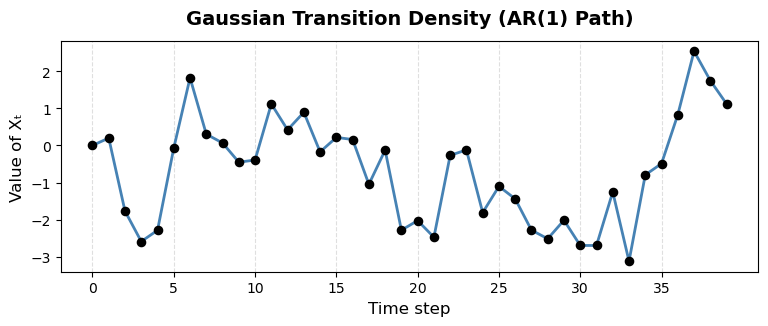

In [31]:
T = 40
phi = 0.5
sigma = 1
x = np.zeros(T)
for t in range(1, T):
    x[t] = phi * x[t-1] + np.random.normal(0, sigma)

# plot
plt.figure(figsize=(9, 3))
plt.plot(range(T), x, color='steelblue', lw=2)
plt.scatter(range(T), x, color='black', s=35, zorder=3)
plt.title("Gaussian Transition Density (AR(1) Path)", fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("Value of Xₜ", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xticks(np.arange(0, T, 5))
plt.show()

### Chapter 2 - Part 3 - Problem 2

The following is the lgorithm for simulating a Markov chain with the **Uniform transition density**
$$ p(x,y) = \tfrac{1}{2}\,1_{[x-1,\,x+1]}(y), \quad x,y \in \mathbb{R}$$

\begin{array}{l}
\textbf{Algorithm: Simulating a Markov Chain with Uniform Transition Density} \\[6pt]
1.\ \text{Set } X_0 = 0 \text{ (or draw from an initial distribution)} \\[4pt]
2.\ \text{For } i = 1, 2, \ldots, n: \\[2pt]
\quad X_i \sim \text{Uniform}(X_{i-1} - 1,\; X_{i-1} + 1) \\[4pt]
3.\ \text{Return } (X_0, X_1, \ldots, X_n)
\end{array}

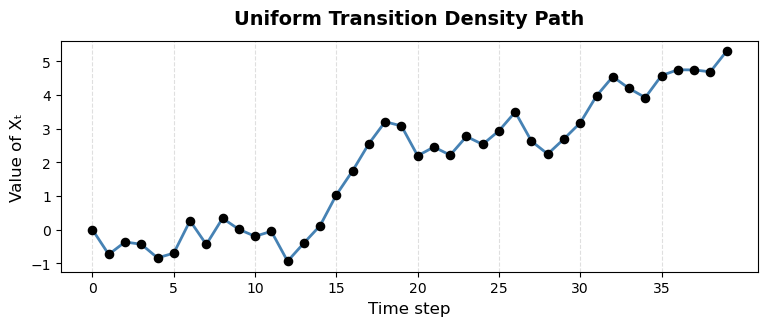

In [32]:
T = 40
x = np.zeros(T)
for t in range(1, T):
    x[t] = np.random.uniform(x[t-1]-1, x[t-1]+1)

# plot
plt.figure(figsize=(9, 3))
plt.plot(range(T), x, color='steelblue', lw=2)
plt.scatter(range(T), x, color='black', s=35, zorder=3)
plt.title("Uniform Transition Density Path", fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("Value of Xₜ", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xticks(np.arange(0, T, 5))
plt.show()

### Extra

Reflcted Random Walk

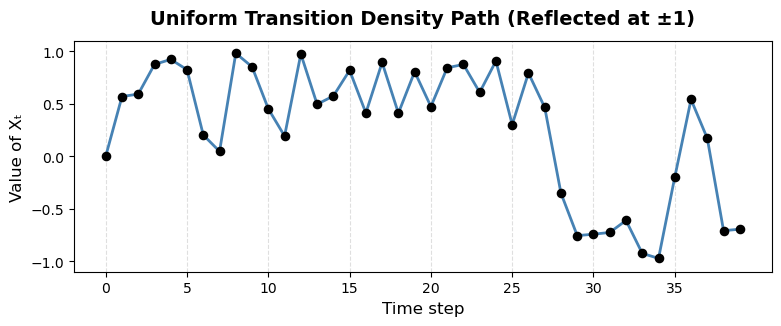

In [33]:
T = 40
x = np.zeros(T)
for t in range(1, T):
    x[t] = np.random.uniform(x[t-1] - 1, x[t-1] + 1)
    # reflect at boundaries [-1, 1]
    if x[t] < -1:
        x[t] = -1 + (-1 - x[t])   # reflect upward
    elif x[t] > 1:
        x[t] = 1 - (x[t] - 1)     # reflect downward

# plot
plt.figure(figsize=(9, 3))
plt.plot(range(T), x, color='steelblue', lw=2)
plt.scatter(range(T), x, color='black', s=35, zorder=3)
plt.title("Uniform Transition Density Path (Reflected at ±1)", fontsize=14, fontweight='bold', pad=12)
plt.xlabel("Time step", fontsize=12)
plt.ylabel("Value of Xₜ", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.xticks(np.arange(0, T, 5))
plt.ylim(-1.1, 1.1)
plt.show()

### Chapter 2 - Part 4 - Problem 1

To simulate a Poisson process with **non-homogeneous intensity** $\lambda(x_1,x_2)$ over a rectangle:

1. Compute the **maximum intensity** $\lambda_{\max}$ over the rectangle.
2. Generate a **homogeneous Poisson process** with intensity $\lambda_{\max}$ over the rectangle.
3. For each point $(x_1, x_2)$, accept it with probability
   $$ \frac{\lambda(x_1,x_2)}{\lambda_{\max}} $$
   (this is the **thinning step**).
4. The accepted points form a realization of the non-homogeneous Poisson process.


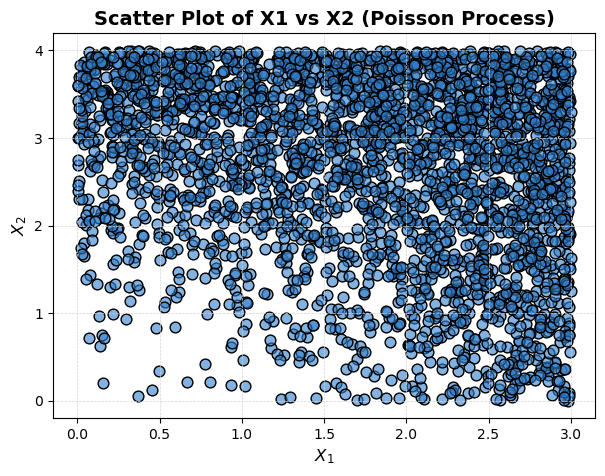

In [34]:
# non-homogeneous intensity
def lambda_func(x1, x2):
    return 30 * (x1**2 + x2**2)

# rectangle boundaries
x1_min, x1_max = 0, 3
x2_min, x2_max = 0, 4

# maximum intensity for thinning
lambda_max = lambda_func(x1_max, x2_max)

# Sstep 1: number of candidate points from homogeneous Poisson
area = (x1_max - x1_min) * (x2_max - x2_min)
N = np.random.poisson(lambda_max * area)

# step 2: generate candidate points uniformly over the rectangle
X1 = np.random.uniform(x1_min, x1_max, N)
X2 = np.random.uniform(x2_min, x2_max, N)

# step 3: Thinning
U = np.random.uniform(0, 1, N)
accepted = U < lambda_func(X1, X2) / lambda_max
X1_thin = X1[accepted]
X2_thin = X2[accepted]

# plot
plt.figure(figsize=(7, 5))
plt.scatter(X1_thin, X2_thin, 
            color=(0.2, 0.5, 0.8, 0.6), 
            s=60, edgecolor='black')
plt.xlabel(r'$X_1$', fontsize=12)
plt.ylabel(r'$X_2$', fontsize=12)
plt.title("Scatter Plot of X1 vs X2 (Poisson Process)", fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgrey')
plt.xticks(np.arange(0, x1_max+0.5, 0.5))
plt.yticks(np.arange(0, x2_max+1, 1))
plt.show()